Biblioteki potrzebne do wykonania zadania.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

Klasa Punkt

In [ ]:
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y

#Wypisanie linii
  def print_point(self):
    print(f"x= {self.x} y= {self.y}")

Klasa Linia

In [ ]:
class Line:
  def __init__(self, a, b):
    self.a = a
    self.b = b

#Wypisanie linii
  def print_line(self):
    if self.b == 0:
      print(f"Równanie linii: y= {round(self.a,3)} * x")
    elif self.b < 0:
       print(f"Równanie linii: y= {round(self.a,3)} * x {self.b}")
    else:
      print(f"Równanie linii: y= {round(self.a,3)} * x + {self.b}")

Klasa Trójkąt

In [ ]:
class Triangle:
    def __init__(self, point1, point2, point3):
        self.point1 = point1
        self.point2 = point2
        self.point3 = point3

    @staticmethod
    def area(a, b, c):
        p = (a + b + c) / 2  # Polowa obwodu trójkąta
        area = math.sqrt(p * (p - a) * (p - b) * (p - c))  # Wzór Herona
        return area

    # Wyświetlenie trójkąta
    def print_triangle(self):
        plt.plot([self.point1.x, self.point2.x], [self.point1.y, self.point2.y], color='blue')
        plt.plot([self.point2.x, self.point3.x], [self.point2.y, self.point3.y], color='blue')
        plt.plot([self.point3.x, self.point1.x], [self.point3.y, self.point1.y], color='blue')

        plt.xlabel('Współrzędne x')
        plt.ylabel('Współrzędne y')
        plt.title('Triangle')
        plt.legend()
        plt.grid(True)
        plt.show()

    #Sprawdzenie przynaleźności punktu:
    #Sposób 1:
    def is_point_in_triangle1(self, point):
       s = surface(self)
       #Tworzenie nowych trójkątów
       triangle1=Triangle(self.point1, self.point2, point)
       triangle2=Triangle(self.point2, self.point3, point)
       triangle3=Triangle(self.point3, self.point1, point)

       s1 = surface(triangle1)
       s2 = surface(triangle2)
       s3 = surface(triangle3)

       if(s > s1+s2+s2):
          print("Punkt nie znajduje się w obszarze trójkąta :<")
       else:
          print("Punkt znajduje się w obszarze trójkąta :>")

    #Sposób 2:
    def is_point_in_triangle2(self, point):
      #Tworzenie odcinków
        segment1 = Segment(self.point1, point)
        segment2 = Segment(self.point2, point)
        segment3 = Segment(self.point3, point)

        sum = calculate_angle(segment1, segment2)
        sum = sum + calculate_angle(segment2, segment3)
        sum = sum + calculate_angle(segment3, segment1)

        if(sum == 360):
          print("Punkt znajduje się w obszarze trójkąta :<")
        else:
          print("Punkt nie znajduje się w obszarze trójkąta :>")

Pole trójkąta liczone jest ze wzoru:
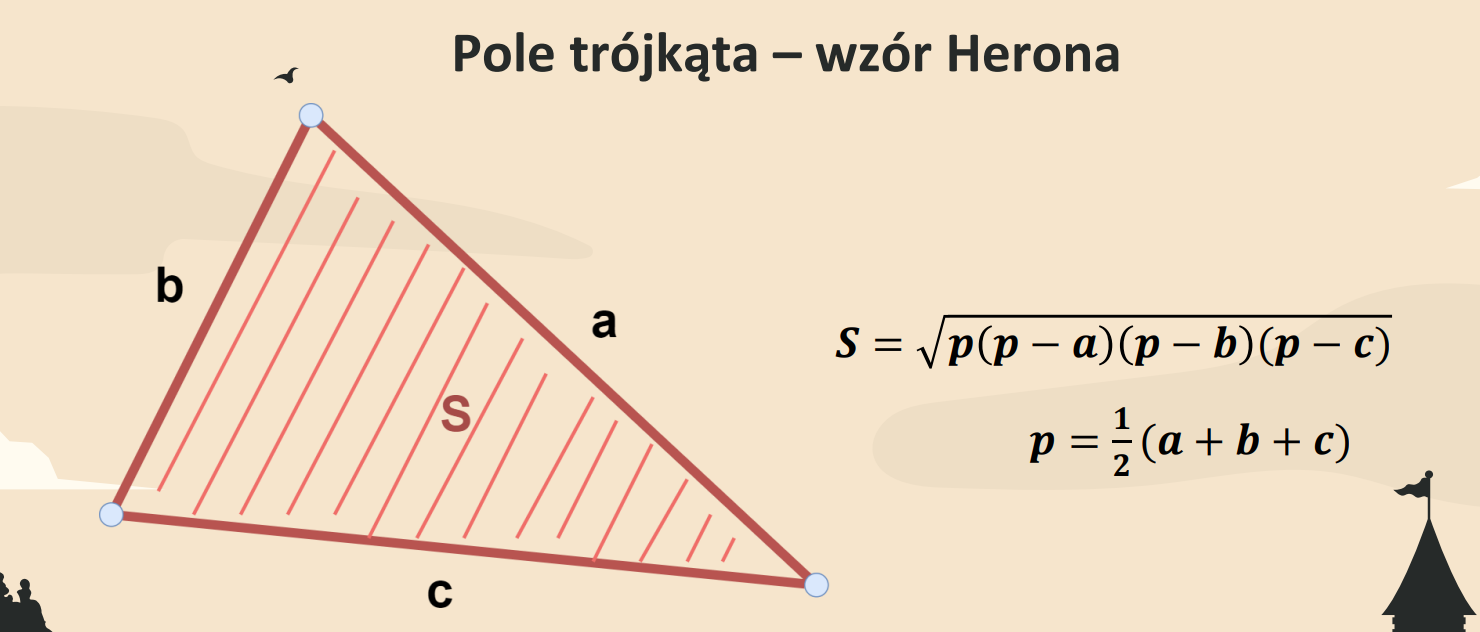

Przynaleźność punktu do trójkąta:

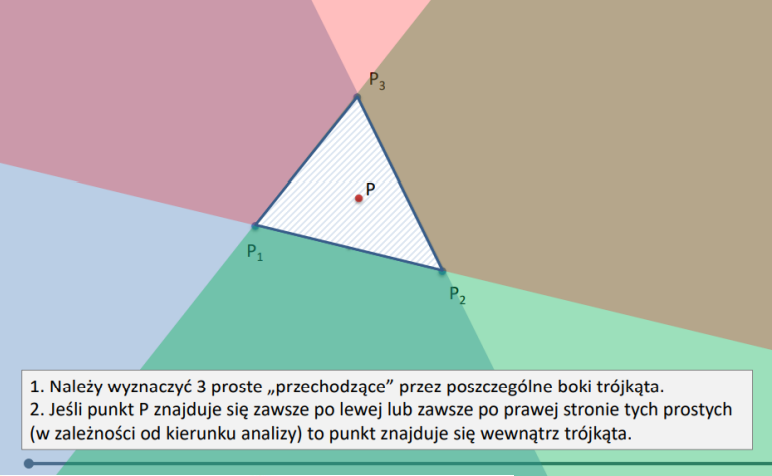

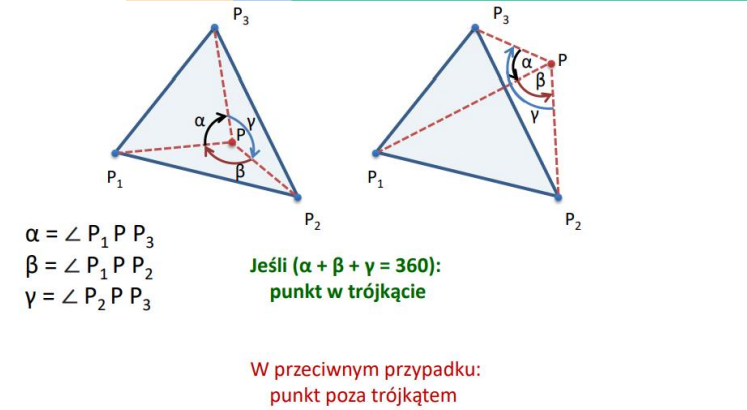

Klasa Odcinek

In [ ]:
class Segment:
    def __init__(self, start, end):
        self.start = start
        self.end = end

#Wyświetlenie odcinka
    def draw_line_segment(self):
        plt.plot([self.start.x, self.end.x], [self.start.y, self.end.y], 'b-', label='Odcinek')
        plt.scatter(self.start.x, self.start.y, color='red', label='Punkt początkowy')
        plt.scatter(self.end.x, self.end.y, color='green', label='Punkt końcowy')
        plt.legend()
        plt.show()

#Obliczanie długości odcinka
    def length(self):
        return math.sqrt((self.end.x - self.start.x)**2 + (self.end.y - self.start.y)**2)

Klasa Wielokąt

In [ ]:
class Polygon:
    def __init__(self, vertices):
        self.vertices = vertices

    def draw_polygon(self):
        n = len(self.vertices)

        x_coords = [vertex.x for vertex in self.vertices]
        y_coords = [vertex.y for vertex in self.vertices]
        x_coords.append(self.vertices[0].x)  # Dodanie pierwszego punktu na końcu, aby zamknąć wielokąt
        y_coords.append(self.vertices[0].y)  # Dodanie pierwszego punktu na końcu, aby zamknąć wielokąt

        plt.plot(x_coords, y_coords, 'b-', label='Wielokąt')

        for vertex in self.vertices:
            draw_point(vertex)

        plt.title('Polygon')
        plt.xlabel('Współrzędne X')
        plt.ylabel('Współrzędne Y')
        plt.grid(True)

# Sprawdzenie przynależności punktu do wielokąta
    def is_point_in_polygon(self, point):
        crossings = 0 #licznik przecieć
        x, y = point.x, point.y
        vertices = self.vertices
        n = len(vertices)   # Liczba wierzchołków wielokąta

        for i in range(n):
          # Sprawdzenie, czy odcinek między bieżącym wierzchołkiem a następnym przecina poziom punktu
            if ((vertices[i].y < y and vertices[(i + 1) % n].y >= y) or (vertices[(i + 1) % n].y < y and vertices[i].y >= y)):
              # Sprawdzenie, czy odcinek przecina się z poziomem punktu - rozdzielenie na lewą i prawą strone
                if (vertices[i].x + (y - vertices[i].y) / (vertices[(i + 1) % n].y - vertices[i].y) * (vertices[(i + 1) % n].x - vertices[i].x) < x):
                    crossings += 1  # Zwiększenie licznika przecięć
      #Sprawdzenie parzystości
        if crossings % 2 == 1:
            print("Punkt znajduje się wewnątrz wielokąta.")
        else:
            print("Punkt znajduje się na zewnątrz wielokąta.")

Sprawdzanie przynależności punktu do wielokątu

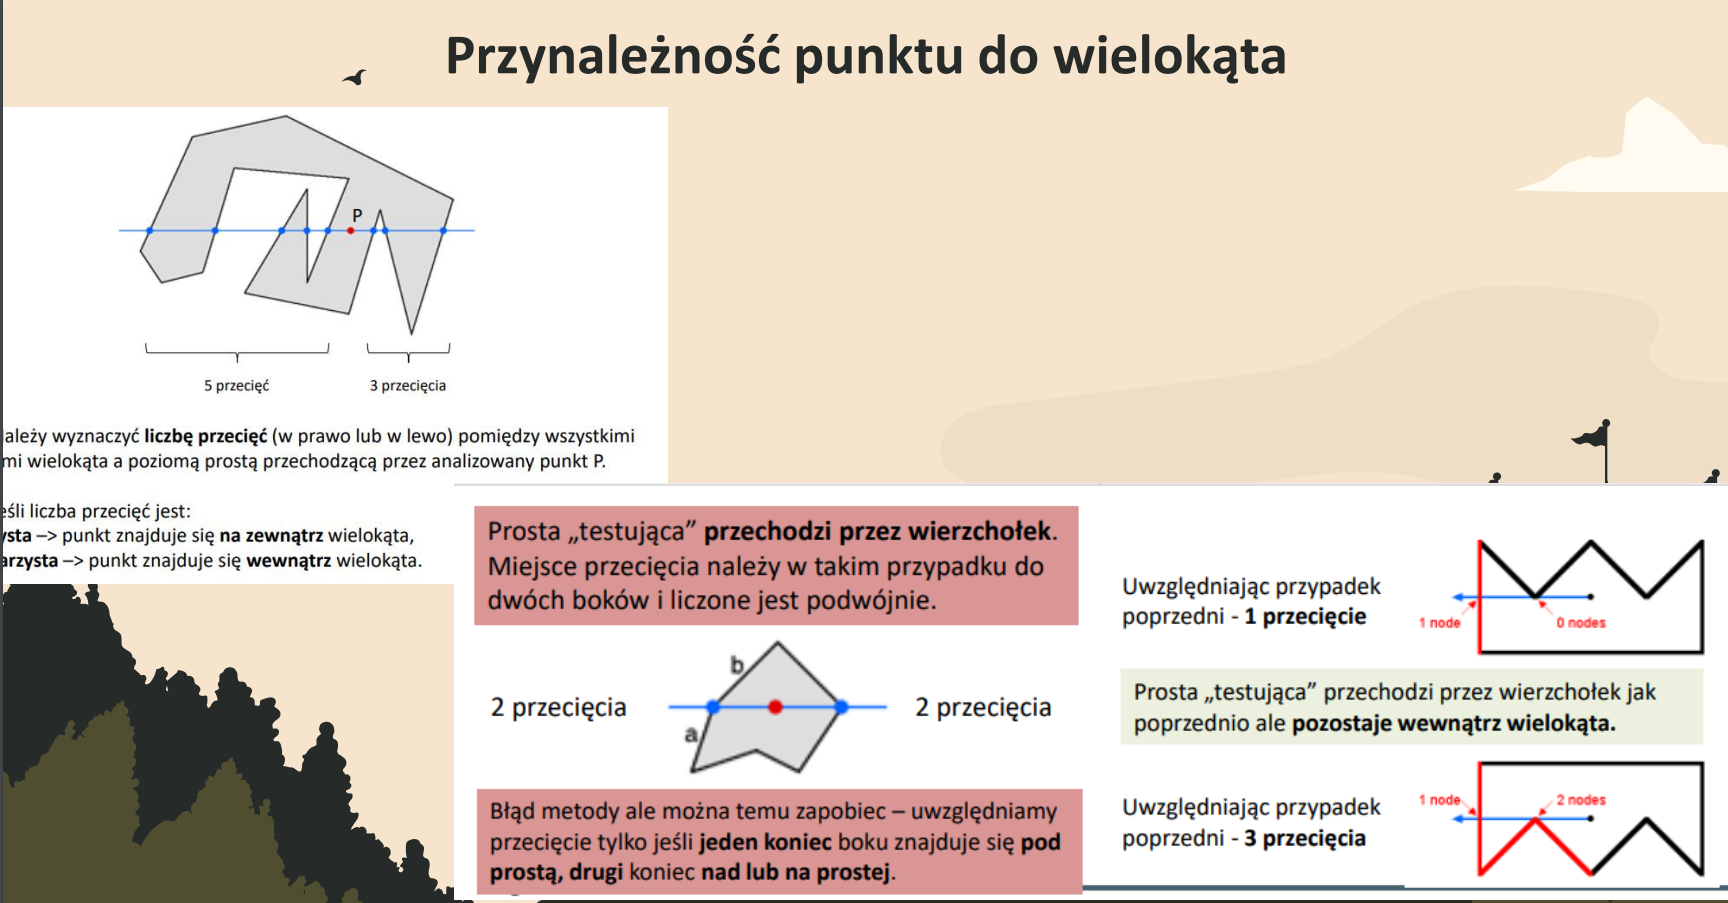

Funkcje pomocnicze

In [ ]:
def create_point_from_user_input():
  x = float(input("Podaj współrzędną x punktu: "))
  y = float(input("Podaj współrzędną y punktu: "))

  return Point(x, y)

def create_line_from_user_input():
  a = float(input("Podaj wartość współczynnika kierunkowego a: "))
  b = float(input("Podaj wartość wyrazu wolnego b:  "))

  return Line(a, b)

#Odległość między punktami
def distance_between_points(point1, point2):
  distance = math.sqrt((point1.x-point2.x)**2 + (point1.y-point2.y)**2)
  return distance

#Oblicznie kąta między odcinkami
def calculate_angle(segment1, segment2):
    # Obliczenie iloczynu skalarnego
    dot_product = (segment1.end.x - segment1.start.x) * (segment2.end.x - segment2.start.x) + (segment1.end.y - segment1.start.y) * (segment2.end.y - segment2.start.y)

    # Obliczenie długości obu odcinków
    length_segment1 = segment1.length()
    length_segment2 = segment2.length()

    # Obliczenie kąta między odcinkami
    cos_angle = dot_product / (length_segment1 * length_segment2)
    angle_rad = math.acos(cos_angle)
    angle_deg = math.degrees(angle_rad)

    return angle_deg

def surface(triangle):
    # Obliczenie długości boków trójkąta
    a = distance_between_points(triangle.point1, triangle.point2)
    b = distance_between_points(triangle.point2, triangle.point3)
    c = distance_between_points(triangle.point3, triangle.point1)

    return triangle.area(a, b, c)


Kąt pomiędzy dwoma odcinkami liczony jest ze wzoru:
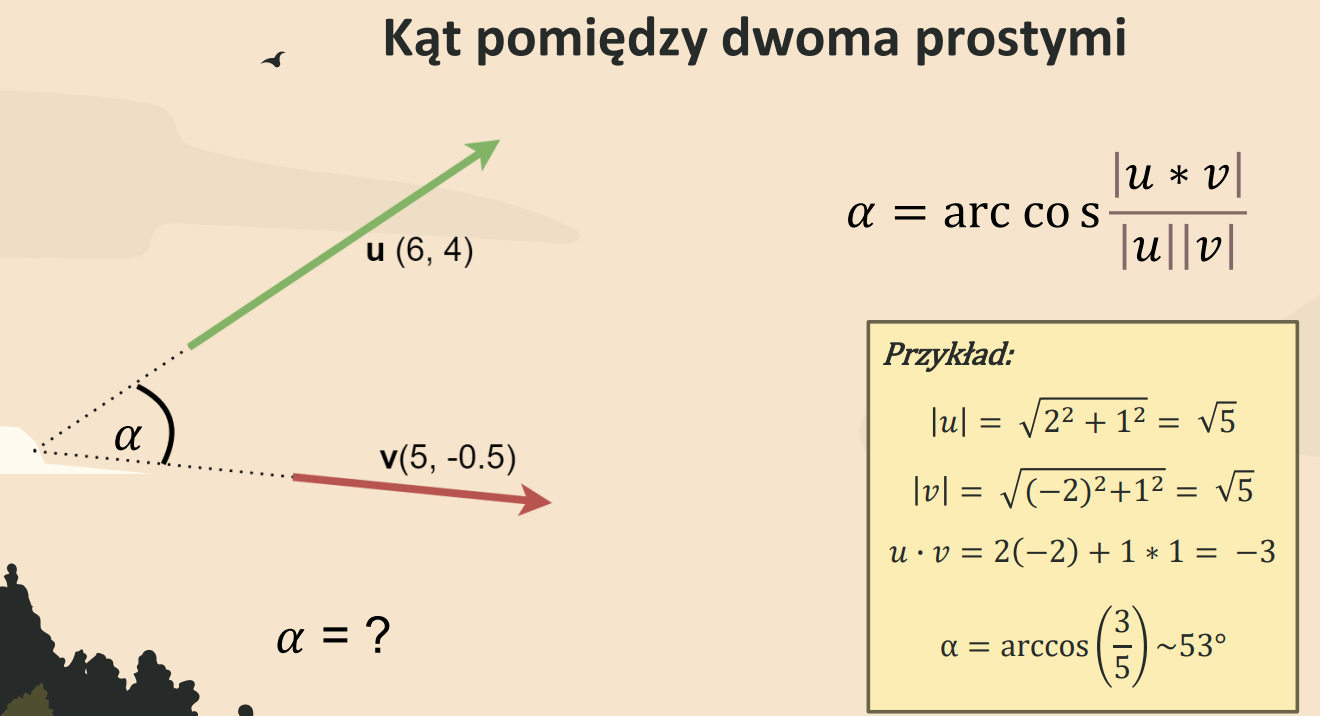

Funkcje do wizualizacji danych

In [ ]:
def draw_segments(segment1, segment2, angle):
    # Wyświetlenie odcinka 1
    plt.plot([segment1.start.x, segment1.end.x], [segment1.start.y, segment1.end.y], 'b-', label='Odcinek 1')
    plt.scatter(segment1.start.x, segment1.start.y, color='red', label='Punkt początkowy 1')
    plt.scatter(segment1.end.x, segment1.end.y, color='green', label='Punkt końcowy 1')

    # Wyświetlenie odcinka 2
    plt.plot([segment2.start.x, segment2.end.x], [segment2.start.y, segment2.end.y], 'r-', label='Odcinek 2')
    plt.scatter(segment2.start.x, segment2.start.y, color='orange', label='Punkt początkowy 2')
    plt.scatter(segment2.end.x, segment2.end.y, color='purple', label='Punkt końcowy 2')

    # Wyświetlenie kąta między odcinkami
    plt.text(segment1.start.x, segment1.start.y, f'Angle: {angle:.2f}', fontsize=12, color='green', ha='right')

    plt.xlabel('Współrzędne x')
    plt.ylabel('Współrzędne y')
    plt.title('Kąt między odcinkami')
    plt.legend()
    plt.grid(True)
    plt.show()

def draw_point(point):
    plt.plot(point.x, point.y, 'ro', label='Punkt')

Menu:

Menu Lab_04:
1. Obliczenie pola trójkąta.
2. Obliczenie pola pomiędzy dwoma liniami.
3. Sprawdzenie przynależności punktu do trójkąta. (suma trójkątów)
4. Sprawdzenie przynależności do punktu - sposób 2.
5. Sprawdzenie przynależności punktu do wielokąta.
Wybierz opcje: 5
Podaj ilość wierzchołków wielokąta:4
Wierzchołek nr. 1:
Podaj współrzędną x punktu: 0
Podaj współrzędną y punktu: 0
Wierzchołek nr. 2:
Podaj współrzędną x punktu: 1
Podaj współrzędną y punktu: 2
Wierzchołek nr. 3:
Podaj współrzędną x punktu: 5
Podaj współrzędną y punktu: 6
Wierzchołek nr. 4:
Podaj współrzędną x punktu: 2
Podaj współrzędną y punktu: 8
Podaj współrzedne punktu, którego chcesz sprawdzic przynależność do wielokąta.
Podaj współrzędną x punktu: 2
Podaj współrzędną y punktu: 4
Punkt znajduje się wewnątrz wielokąta.


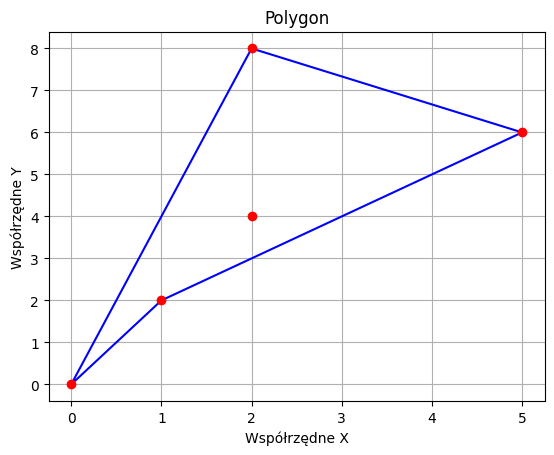

In [ ]:
def main():
  print("Menu Lab_04:")
  print("1. Obliczenie pola trójkąta.")
  print("2. Obliczenie pola pomiędzy dwoma liniami.")
  print("3. Sprawdzenie przynależności punktu do trójkąta. (suma trójkątów)")
  print("4. Sprawdzenie przynależności do punktu - sposób 2.")
  print("5. Sprawdzenie przynależności punktu do wielokąta.")

  option = input("Wybierz opcje: ")
  if option == "1":
    print("Podaj punkty aby utworzyć trojkat.")
    point1 = create_point_from_user_input()
    point2 = create_point_from_user_input()
    point3 = create_point_from_user_input()

    # Obliczenie długości boków trójkąta
    a = distance_between_points(point1, point2)
    b = distance_between_points(point2, point3)
    c = distance_between_points(point3, point1)

    # Sprawdzenie warunku istnienia trójkąta
    if a + b > c and a + c > b and b + c > a:
      triangle = Triangle(point1, point2, point3)
      area = triangle.area(a, b, c)
      triangle.print_triangle()

      print(f"Pole trójkąta wynosi: {area}")
    else:
      print("Nie mozna utorzyć trójkata :<")
  elif option == "2":
    print("Podaj punkty, aby utworzyć odcinek:")
    start = create_point_from_user_input()
    end = create_point_from_user_input()
    segment = Segment(start, end)

    print("Podaj punkty, aby utworzyć drugi odcinek:")
    start = create_point_from_user_input()
    end = create_point_from_user_input()
    segment2 = Segment(start, end)

    #Oblicznie kąta miedzy 2 odcinkami
    angle = calculate_angle(segment, segment2)

    print(f"Kąt między odcinkami: {angle:.2f}")

    draw_segments(segment, segment2, angle)

  elif option =="3":
    print("Podaj punkty aby utworzyć trojkat.")
    point1 = create_point_from_user_input()
    point2 = create_point_from_user_input()
    point3 = create_point_from_user_input()

    # Obliczenie długości boków trójkąta
    a = distance_between_points(point1, point2)
    b = distance_between_points(point2, point3)
    c = distance_between_points(point3, point1)

    # Sprawdzenie warunku istnienia trójkąta
    if a + b > c and a + c > b and b + c > a:
      triangle = Triangle(point1, point2, point3)

      print("Podaj współrzedne punktu, którego chcesz sprawdzic przynależność do trójkąta.")
      point = create_point_from_user_input()
      triangle.is_point_in_triangle1(point)

      draw_point(point)
      triangle.print_triangle()

    else:
      print("Nie mozna utorzyć trójkata :<")
  elif option =="4":
    print("Podaj punkty aby utworzyć trojkat.")
    point1 = create_point_from_user_input()
    point2 = create_point_from_user_input()
    point3 = create_point_from_user_input()

    # Obliczenie długości boków trójkąta
    a = distance_between_points(point1, point2)
    b = distance_between_points(point2, point3)
    c = distance_between_points(point3, point1)

    # Sprawdzenie warunku istnienia trójkąta
    if a + b > c and a + c > b and b + c > a:
      triangle = Triangle(point1, point2, point3)

      print("Podaj współrzedne punktu, którego chcesz sprawdzic przynależność do trójkąta.")
      point = create_point_from_user_input()
      triangle.is_point_in_triangle2(point)

      draw_point(point)
      triangle.print_triangle()
    else:
      print("Nie mozna utorzyć trójkata :<")
  elif option == "5":
      numbers = int(input("Podaj ilość wierzchołków wielokąta:"))

      if(numbers <= 3):
        print("Za mało, spróbuj podać więcej wierzchołków.")
      else:
        vertices = [] #lista będzie przechowywać wierzchołki wielokąta
        for i in range(numbers):
          print(f"Wierzchołek nr. {i+1}:")
          point = create_point_from_user_input();
          vertices.append(point)
        polygon = Polygon(vertices)

        print("Podaj współrzedne punktu, którego chcesz sprawdzic przynależność do wielokąta.")
        point = create_point_from_user_input()

        polygon.is_point_in_polygon(point);

        draw_point(point)
        polygon.draw_polygon()
  else:
    print("Nieprawiodłowy wybór :<")


if __name__ == "__main__":
    main()